# Data Science Salary Analysis


Read webscraping data. This data required more cleaning.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv("DataScientistJobsData.csv")
df[0:5]

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [3]:
salarylow = df["Salary Estimate"].str.split('[$K-]', expand = True)[1].astype(float)
salaryhigh = df["Salary Estimate"].str.split('[$K-]', expand = True)[4].astype(float)
salarymean = (salarylow + salaryhigh)*1000/2
salarymean

0       146000.0
1       146000.0
2       146000.0
3       146000.0
4       146000.0
          ...   
3904     83500.0
3905     83500.0
3906     83500.0
3907     83500.0
3908     83500.0
Length: 3909, dtype: float64



Since this salary data is a long string, we are converting it by splitting then convert to floats in order to analysis it. For this study, we'll keep this part simpler by just combine the high and low salary estimate range into a single number with its average, before doing actual analysis.

Ideally we will want a more accurate source and not an estimate range for our analysis, but we will work with what we have here for this study.


In [4]:
city = df["Location"].str.split(',', expand = True)[0]
state = df["Location"].str.split(', ', expand = True)[1]
state.unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'DE', 'PA', 'United Kingdom',
       'FL', 'OH'], dtype=object)

There is some UK data mix into the US, we'll just analyst the US for the study.

In [5]:
cleandf = df[['Job Title','Sector']]
cleandf['Salary Est.'] = salarymean
cleandf['City'] = city
cleandf['State'] = state

In [6]:
dropindex = cleandf[ cleandf["State"] == "United Kingdom" ].index
cleandf.drop(dropindex , inplace=True)
cleandf["State"].unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'DE', 'PA', 'FL', 'OH'],
      dtype=object)

In [7]:
cleandf.count()

Job Title      3905
Sector         3905
Salary Est.    3884
City           3905
State          3905
dtype: int64

In [8]:
cleandf['Salary Est.'].isna().sum()

21

We notice the data in 4 column dosen't add up, as we can see there is missing values in dataset, we are going remove all the rows with missing circtical values, which is the salary data.

In [9]:
cleandf.dropna(inplace=True)
cleandf.count()

Job Title      3884
Sector         3884
Salary Est.    3884
City           3884
State          3884
dtype: int64

In [10]:
cleandf['Salary Est.'].isna().sum()

0

Double check.. Good!

In [11]:
cleandf['Sector'].unique()
cleandf['Sector'] = cleandf['Sector'].replace({'-1':'Unknown'})
cleandf.count()

Job Title      3884
Sector         3884
Salary Est.    3884
City           3884
State          3884
dtype: int64

Further clean some dirty value we spot...

#### Now the data is clean up, and ready to analysis.

## Detecting Oulier:

<AxesSubplot:>

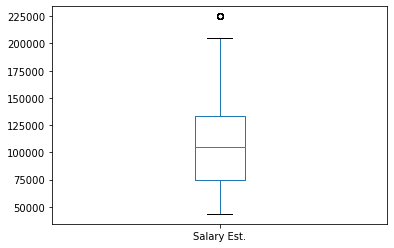

In [12]:
cleandf.boxplot(column =['Salary Est.'], grid = False)

In [13]:
(cleandf['Salary Est.'] >= 210000).sum()

29

There is 29 data above 205k which is highly above the median, since we have 3888 datas and only 29 outliers, which is only about 0.007% of all the data we have, we'll remove the 29 outliers is this case.

In [14]:
dropindex = cleandf[ cleandf['Salary Est.'] >= 210000 ].index
cleandf.drop(dropindex , inplace=True)
cleandf.count()

Job Title      3855
Sector         3855
Salary Est.    3855
City           3855
State          3855
dtype: int64

array([[<AxesSubplot:title={'center':'Salary Est.'}>]], dtype=object)

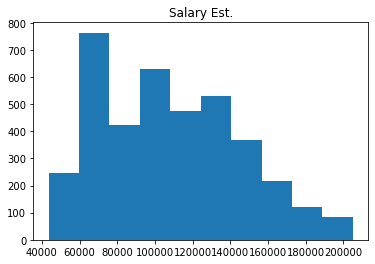

In [15]:
cleandf.hist(column =['Salary Est.'], grid = False)

## Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='State', ylabel='Salary Est.'>

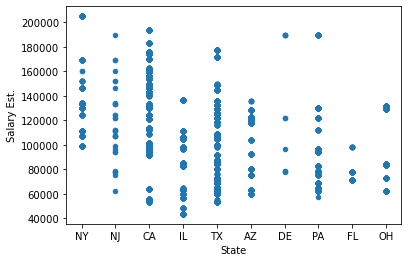

In [16]:
cleandf.plot.scatter(x='State', y='Salary Est.')

Text(0.5, 0, 'Salary Est.')

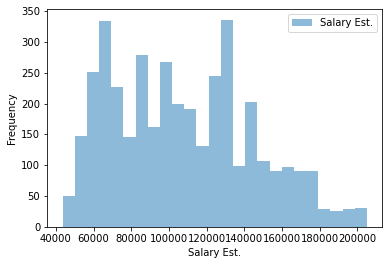

In [17]:
import seaborn as sns
#sns.pairplot(cleandf,hue='State', size=3)
ax = cleandf.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Salary Est.')

array([[<AxesSubplot:title={'center':'AZ'}>,
        <AxesSubplot:title={'center':'CA'}>,
        <AxesSubplot:title={'center':'DE'}>],
       [<AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'IL'}>,
        <AxesSubplot:title={'center':'NJ'}>],
       [<AxesSubplot:title={'center':'NY'}>,
        <AxesSubplot:title={'center':'OH'}>,
        <AxesSubplot:title={'center':'PA'}>],
       [<AxesSubplot:title={'center':'TX'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

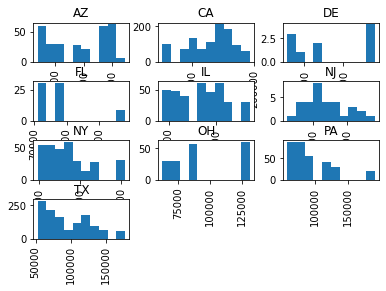

In [18]:
cleandf.hist(column =['Salary Est.'],by=['State'], grid = False)

<AxesSubplot:title={'center':'Salary Est.'}, xlabel='[State]'>

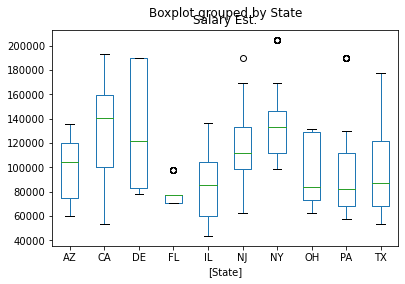

In [19]:
cleandf.boxplot(column =['Salary Est.'],by=['State'], grid = False)

<AxesSubplot:title={'center':'Salary Est.'}, xlabel='[Sector]'>

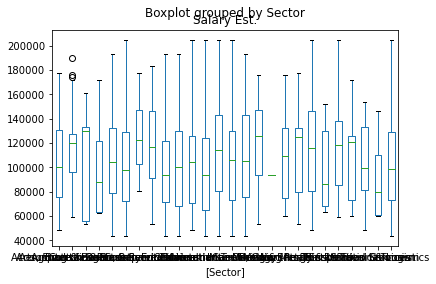

In [20]:
cleandf.boxplot(column =['Salary Est.'],by=['Sector'], grid = False)

Visually we can see the different sectors are quite similar overall, and state location has a very clear difference. 
Therefore, geography location can possible play bigger on the effect on salary.

In [21]:
cleandf['Salary Est.'].describe()

count      3855.000000
mean     107426.977951
std       37050.242520
min       43500.000000
25%       75000.000000
50%      104500.000000
75%      132750.000000
max      205000.000000
Name: Salary Est., dtype: float64

## Hypothesis Testing:

1. California is the highest median salary state for Data Science.
2. Location is the biggest impact toward salary verus other factors.
3. The median salary of Data Scienctist is above 100K.

For this study, we are going to conduct a sigificance hypotheses test on "California is the highest median salary state for Data Science."

This data set represent all the job offer available.

#### Ho: "California is not signficantly different than the US average in Data Science salary." 

#### Ha: "California is signficantly different than the US average in Data Science salary." 

In [22]:
population_mean = cleandf['Salary Est.'].mean()
ca_mean = cleandf[cleandf['State'] == "CA"]['Salary Est.'].mean()
print(population_mean)
print(ca_mean)

107426.97795071336
130799.12875121007


In [23]:
import scipy.stats as stats
ca_data = cleandf[cleandf['State'] == "CA"]['Salary Est.']
stats.ttest_1samp(a = ca_data, 
                  popmean = population_mean)

Ttest_1sampResult(statistic=20.816561705161995, pvalue=1.2436874308833151e-80)

Since the P-Value is 1.24 which is higher than 0.05. 

We can not conclude that California is significantly different than the overall US average.

### Next steps:

We can also t-test on location vs other factors.

### Summary:

In summary, this data set is not very high quility since is from a webscraper, lot of format need to be clean and convert, the estimate range also can not represent the true value. Overall, it's more ideal to analysis on more higher quilty sources in a formulate and detail on the subject, like the census data.

Thanks for reading!

Louis Wong